# 02. Model CNN - Data Augmentation

### Importando os arquivos do projeto no Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando as bibliotecas

In [2]:
import sys
import os
from pathlib import Path
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset

In [4]:
df = keras.datasets.cifar10 # Armazenando o dataset em uma variável

In [5]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
] # Definindo uma legenda para as classes

### Definindo o modelo Keras a partir de um pipeline

In [7]:
# Etapa inicial
model = keras.models.Sequential() # Instanciando o modelo

# Etapas de pré processamento
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3))) # Passando o shape dos dados para o modelo
model.add(keras.layers.Rescaling(scale=1./255)) # Fazendo o rescaling dos dados entre 0 e 255 para 0 e 1

# Etapas de data augmentation
model.add(keras.layers.RandomRotation(0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso rotação da imagem
model.add(keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso translação da imagem
model.add(keras.layers.RandomZoom(0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso zoom na imagem
model.add(keras.layers.RandomFlip('horizontal')) # Aplicando o Data Augmentation para aumento dos dados, nesse caso flip na imagem somente na horizontal, pois o modelo não está sendo treinando com imagens de cabeça para baixo

# Etapas de CNN
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Dropout(0.2)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Dropout(0.2)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting

# Etapas de camadas ocultas
model.add(keras.layers.Flatten()) # Realizando a redução de dimensionalidade/achatamento
model.add(keras.layers.Dense(10, activation='softmax')) # Passando a camada de sáida (10 = valores de resultados possíveis (0 a 9))

model.summary() # Exibindo o resumo do treinamento

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation (RandomRotation)     │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 32, 32, 3)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom (RandomZoom)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip (RandomFlip)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          81,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,578 (615.54 KB)

 Trainable params: 157,578 (615.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3) # Definindo o otimizador
loss = keras.losses.SparseCategoricalCrossentropy() # Definindo a função de busca
metric = keras.metrics.SparseCategoricalAccuracy() # Definindo a métrica a ser considerada durante o treinamento

model.compile(optimizer=optimizer, loss=loss, metrics=[metric]) # Compilando o modelo

### Treinando o modelo

In [9]:
early_stop = keras.callbacks.EarlyStopping( # Configurando um callback que interrompe o treinamento do modelo caso o desempenho pare de melhorar, com base em métricas monitoradas
    patience = 5, # Definindo o patience, que é o número de epochs consecutivas em que a métrica monitorada pode não melhorar antes de interromper o treinamento
    verbose = 1, # Definindo o verbose para exibir a informação de quando o callback for acionado caso aconteça
    min_delta = 1E-4, # Definindo a menor diferença aceitável para considerar que houve melhora em uma métrica monitorada
)

history = model.fit( # Treinando o modelo e armazenando o seu resultado em uma variável
    x_train, # Passando os valores de x de treino
    y_train, # Passando os valores de y de treino
    epochs = 100, # Definindo o número máximo de epochs, ou seja, quantas vezes o modelo passará por todo o conjunto de treino durante o ajuste
    batch_size = 256, # Definindo o batch size, que é o número de amostras processadas de uma só vez antes de atualizar os pesos do modelo
    validation_split = 0.2, # Definindo a proporção dos dados de treino que será separada para validação
    callbacks = [early_stop] # Definindo o callback com a condição de parada definida anteriormente para interromper o treinamento do modelo
)

Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - loss: 2.0184 - sparse_categorical_accuracy: 0.2661 - val_loss: 1.6837 - val_sparse_categorical_accuracy: 0.4006
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.6005 - sparse_categorical_accuracy: 0.4279 - val_loss: 1.4961 - val_sparse_categorical_accuracy: 0.4816
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.4712 - sparse_categorical_accuracy: 0.4720 - val_loss: 1.3600 - val_sparse_categorical_accuracy: 0.5335
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 1.4321 - sparse_categorical_accuracy: 0.4872 - val_loss: 1.2990 - val_sparse_categorical_accuracy: 0.5542
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 1.3673 - sparse_categorical_accuracy: 0.5148 - val_loss: 1.2820 - val_sparse_categorical_accuracy: 0.5493
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 1.3269 - sparse_categorical_accuracy: 0.5268 - val_loss: 1.1789 - val_sparse_categorical_accuracy

### Fazendo o evaluate do modelo

In [10]:
model.evaluate(x_test, y_test) # Fazendo o evaluate do modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1078 - sparse_categorical_accuracy: 0.6101


[1.1203665733337402, 0.6096000075340271]

### Verificando possíveis condições de overfitting

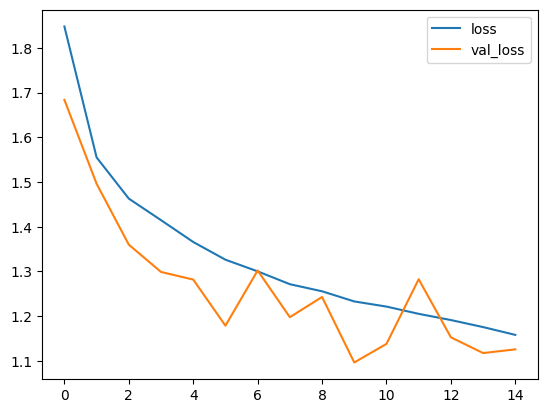

In [11]:
plt.plot(history.history['loss'], label='loss') # Plotando os valores de treino
plt.plot(history.history['val_loss'], label='val_loss') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

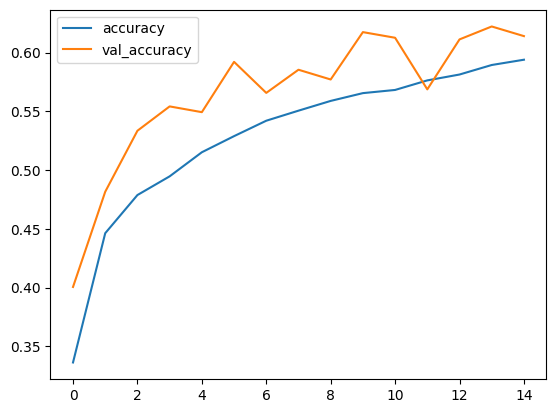

In [12]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy') # Plotando os valores de treino
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

Nesse cenário, após a aplicação do pré processamento de Data Augmentation, os índicios de overfitting não aparecem mais, deixando assim o modelo pronto para ser utilizado com os dados reais.

### Fazendo o predict do modelo com uma amostra dos dados

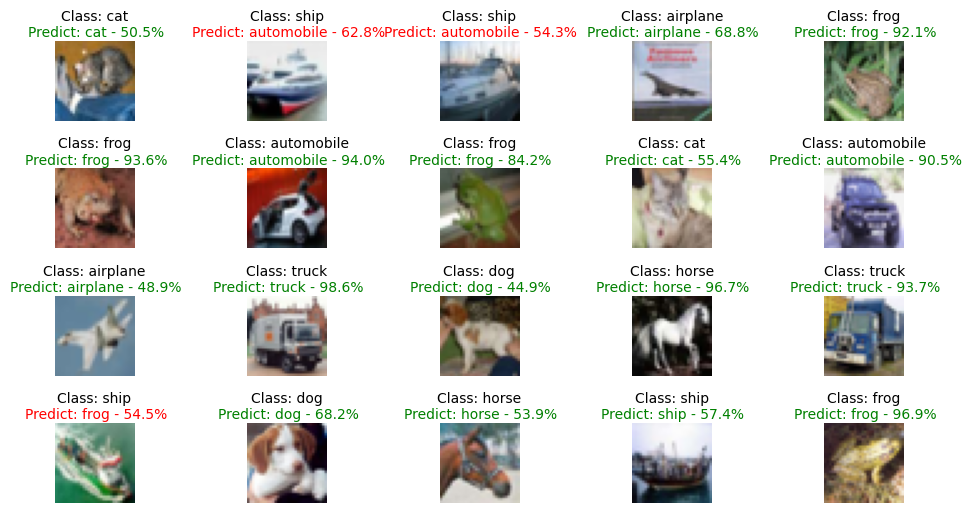

In [13]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_test[i]) # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Class: {class_names[y_test[i][0]]}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        16, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Predict: {class_names[pred.argmax()]} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == y_test[i] else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Salvando o modelo

In [16]:
model.save('/content/drive/MyDrive/Colab Notebooks/ds_projeto_final_10_modelo_classificacao_imagens_site_buscas/models/model_deep_learning.keras') # Salvando o modelo